In [1]:
import Lib.Load as ld
import Lib.Transformations as tr
import Lib.Metrics as mt
import Lib.Modularity as mod
import Lib.SDP as sdp
import Lib.MinCut as mc
import Lib.NCG as ncg
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [17]:
def test_methods(test):
    
    sc_name = ['NMI', 'Recall', 'Precision', 'Modularity', 'Average F1', 'Normalized Cut']
    methods = ['Spectral', 'Spectral_RW', 'Spectral_Sym', 'Greedy Mod.', 'NCG', 'SDP1', 'SDP2']
    #methods = ['Unnormalized', 'RW', 'Symmetric', 'Newman', 'NCG']
    
    scores = np.empty((0, len(sc_name)))
    
    n_nodes, edge_list = ld.download_graph(test)
    A = tr.compute_adj_mat(n_nodes, edge_list)
    labels_true = ld.download_labels(test)
    k = np.max(np.array(labels_true)) + 1
    
    # MinCut test
    labels_pred = mc.unnorm_predict(A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    labels_pred = mc.lrw_predict(A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    labels_pred = mc.lsym_predict(A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    # Modularity test
    labels_pred = mod.Newman(n_nodes, A)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    # NCG test
    labels_pred = ncg.NCG(n_nodes, edge_list, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    # SDP test
    labels_pred = sdp.SDP1(n_nodes, A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    labels_pred = sdp.SDP2(n_nodes, A, k)
    result = compute_scores(labels_true, labels_pred, edge_list)
    scores = np.concatenate([scores, result], axis=0)
    
    
    scores = pd.DataFrame(scores, index=methods, columns=sc_name)
    
    for i in range(len(sc_name)):
        fig = plt.figure()
        sns_plot = sns.barplot(x=methods, y=sc_name[i],data=scores)
        for item in sns_plot.get_xticklabels():
            item.set_rotation(20)
        fig = sns_plot.get_figure()
        fig.savefig(test + '_' + sc_name[i])
        
    return scores

In [18]:
def compute_scores(labels_true, labels_pred, edge_list):
    
    clusters_true = tr.compute_clusters_from_labels(labels_true)
    clusters_pred = tr.compute_clusters_from_labels(labels_pred)
    
    nmi = mt.compute_nmi(labels_true, labels_pred)
    recall = mt.compute_recall(clusters_true, clusters_pred)
    precision = mt.compute_precision(clusters_true, clusters_pred)
    modularity = mt.compute_modularity(labels_pred, edge_list)
    avg_f1 = mt.compute_avg_f1(clusters_true, clusters_pred)
    norm_cut = mt.compute_normalized_cut(labels_pred, clusters_pred, edge_list)
    
    return np.array([[nmi, recall, precision, modularity, avg_f1, norm_cut]])

                   NMI    Recall  Precision  Modularity  Average F1  \
Spectral      0.455002  0.812500   0.875000    0.233974    0.813187   
Spectral_RW   0.313617  0.718750   0.833333    0.192554    0.704348   
Spectral_Sym  0.836504  0.968750   0.973684    0.359961    0.970357   
Greedy Mod.   0.837170  0.972222   0.970588    0.371795    0.970563   
NCG           0.580143  0.888889   0.900000    0.319444    0.881944   
SDP1          0.809511  0.777778   1.000000    0.232742    0.816850   
SDP2          0.684015  0.913194   0.941176    0.344592    0.790553   

              Normalized Cut  
Spectral            0.376068  
Spectral_RW         0.422764  
Spectral_Sym        0.262626  
Greedy Mod.         0.256410  
NCG                 0.342857  
SDP1                1.579855  
SDP2                1.311179  
                   NMI    Recall  Precision  Modularity  Average F1  \
Spectral      0.821431  0.966667   0.968750    0.251998    0.966630   
Spectral_RW   1.000000  1.000000   1.0000

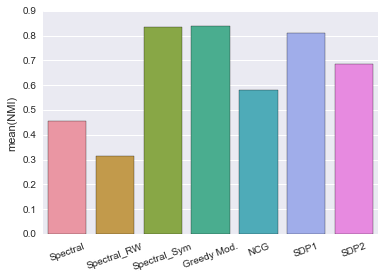

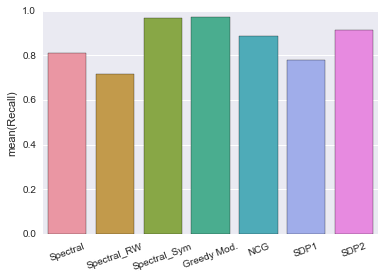

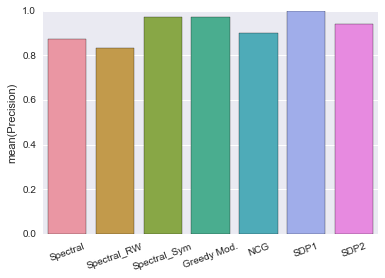

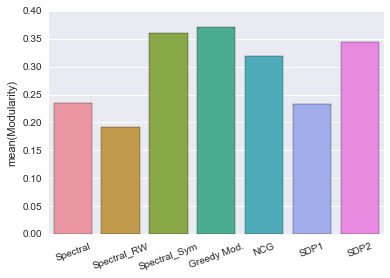

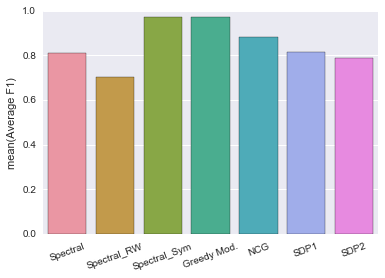

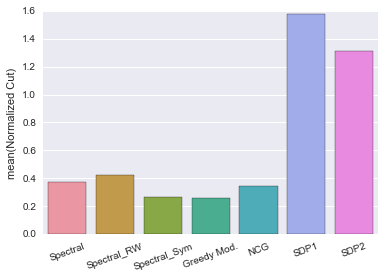

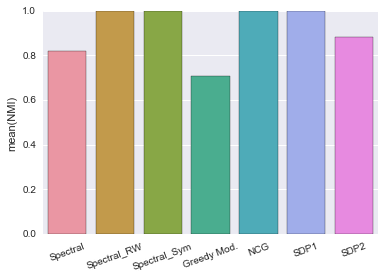

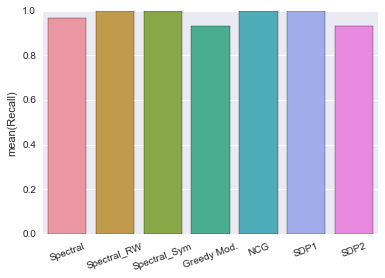

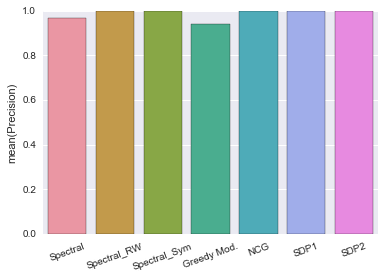

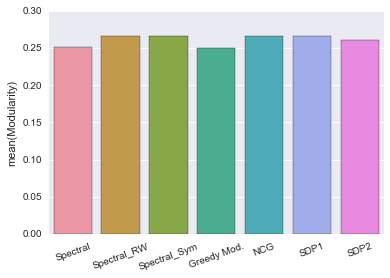

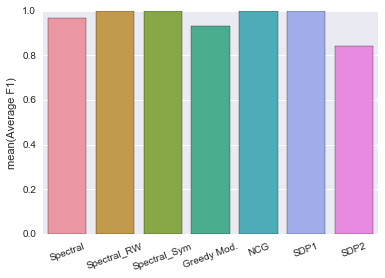

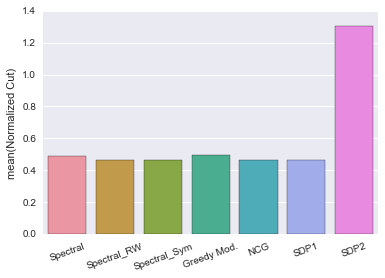

In [19]:
tests = ['football', 'karate', 'polbooks', 'sbm']
for i in [1,3]:
    scores = test_methods(tests[i])
    print(scores)

In [8]:
print(float('inf') > 1e10)

True
